## Código del proyecto


## 1. ELEGIR TEMÁTICA

La temática estará relacionada con las platas solares fotovoltaicas en Europa.
Me gustaría conocer si los países europeos que apuestan por está energía renovable es únicamente por la irradiancia solar que reciben o si hay algún parámetro más que afecte.


## 2. OBTENCIÓN DE DATOS

He buscado en las siguientes plataformas que datos hay disponibles para Europa:

-	https://datacommons.org/

	Población total, Esperanza de vida, Personas desempleadas, Nivel de educación, Generación anual de energía solar, Capacidad instalada de energía solar, Flujo financiero de apoyo a la energía solar, Precipitación media, Superficie país
-	https://datacatalog.worldbank.org

	Irradiancia solar, Desarrollo humano, PIB, Consumo energía, Coste de construcción

	
En líneas generales, los datos estaban aceptables y manejables a excepción de la precipitación media. Estos datos han tenido que ser buscados en reiteradas ocasiones puesto que no eran representativos. 
Con el resto de los datos no se han necesitado hacer más búsquedas.


## 3. DEFINICIÓN DE HIPÓTESIS

Las plantas fotovoltaicas...
-	¿Dependen exclusivamente de la irradiación horizontal global (GHI)?
-	¿Qué características tiene un país europeo que apuesta por la energía solar fotovoltaica?
-	¿Dependerá del tipo de población?
    	Habitantes / km2, Desarrollo humano, Consumo energético medio
-	¿Dependerá del clima?
    	Precipitaciones medias
-	¿Dependerá de la superficie del país?
        Superficie km2
-	¿Dependerá de parámetros económicos?
        PIB, Coste de construcción


## 4. PROCESADO DE DATOS

Importamos bibliotecas

In [2]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


Cargamos archivos e informacion

In [73]:

# Ruta info de irradiancia
file_path = "./data/solargis_pvpotential_countryranking_2020_data.xlsx"
df_ = pd.read_excel(file_path, header=1)

Hacemos manejable la informacion

In [74]:
#Quito las columnas que creo que no interesan:
df_.drop(columns=["ISO_A3", "Note", "World Bank \nRegion", "Evaluated area"], inplace=True)

In [69]:
#Como la tabla es muy grande voy a separar por partes los indicadores, necesito ver todos los parámetros
titulo =list(df_.columns)

In [71]:
#Varios slicing para facilitar el trabajo
#Parametros básicos
df_basic= df_.copy()
df_basic = df_basic.loc[:, titulo[0:6]]
#Parametros de plantas
df_pv= df_.copy()
titulo_seleccionado = [titulo[0]] + (titulo[6:11])  #Dos listas sumadas
titulo_seleccionado
df_pv = df_pv.loc[:,titulo_seleccionado]
#Parametros del sector
df_sector= df_.copy()
titulo_seleccionado = [titulo[0]] + (titulo[12:17])  #Dos listas sumadas
titulo_seleccionado
df_sector = df_sector.loc[:,titulo_seleccionado]

In [75]:
#Estudiamos como esta la info del primer slicing, indicadores básicos
# df_basic.info()
#Vamos a renombrar las columnas porque dan problemas, los caracteres raros e intros
df_basic.columns= ["Pais", "Poblacion_2018", "Area_2018", "Area_Evaluada_Porcentaje", "Desarrollo_humano_2017", "PIB_USD_2018"]
# df_basic.head(2)

In [76]:
#Estudiamos como esta la info del segundo slicing, parametros de plantas
# df_pv.info()
#Vamos a renombrar las columnas porque dan problemas, los caracteres raros e intros
df_pv.columns= ["Pais", "Irradiancia_Global_Horizontal", "Potencial_kWh/kWp/day", "Coste_Economico_USD/kWh_2018", "BORRAR", "Area_equivalente_PV"]
df_pv.drop(columns=["BORRAR"], inplace=True)
# df_pv.head(2)

In [77]:
#Estudiamos como esta la info del tercer slicing, Parametros del sector
# df_sector.info()
#Vamos a renombrar las columnas porque dan problemas, los caracteres raros e intros
df_sector.columns= ["Pais", "Capacidad_instalada_2018", "Acceso_electricidad_rural_2016", "Consumo_kWh_per_capita_2014","borrar" ,"Tarifa_luz_USD/kWh"]
df_sector.drop(columns=["borrar"], inplace=True)
# df_sector.head(2)

Filtramos por solo los paises europeos

In [10]:
#El estudio le vamos a hacer sobre europa, asique voy a filtrar por paises europeos
#Compruebo un pais al azar en inglés para comprobar que machean
cond = df_sector["Pais"] == "Ukraine"
df_sector.loc[cond]


,Pais,Capacidad_instalada_2018,Acceso_electricidad_rural_2016,Consumo_kWh_per_capita_2014,Tarifa_luz_USD/kWh
193,Ukraine,44.88093,100.0,3418.585024,7.1


In [81]:
#Voy a añadir otro dataset población por pais europeo, para cruzar los paises del data set anterior que es mundial para reducir a europa
df_poblacion = pd.read_csv("./data/Europe_Country (4) - poblacion total.csv")
df_poblacion.head(5)
#Renombro los titulos
df_poblacion.columns= ["Diminutivo", "Pais", "Año","Poblacion", "Web"]
# Elimino todas las columnas excepto las de los paises
df_poblacion.drop(columns=["Diminutivo","Año","Poblacion","Web"], inplace=True)

#Tengo info duplicada de varios años, por tanto hay paises repetidos
# Elimino paises duplicados
df_paises = df_poblacion.drop_duplicates()
# df_paises.head(3)

In [82]:
#Voy a cruzar los 3 dataset sol con paises para quedarme solo con europa
df_basic_eu = pd.merge(df_paises,df_basic, on = ["Pais"])
df_basic_eu.sort_values(by = "Pais", inplace=True)
# df_basic_eu.head(3)

In [83]:
df_pv_eu = pd.merge(df_paises,df_pv, on = ["Pais"])
df_pv_eu.sort_values(by = "Pais", inplace=True)
# df_pv_eu.head(3)

In [84]:
df_sector_eu = pd.merge(df_paises,df_sector, on = ["Pais"])
#Vemos que todos tienen 100% de acceso a electricidad rural, eliminamos la columna 
df_sector_eu.drop(columns=["Acceso_electricidad_rural_2016"], inplace=True)
df_sector_eu.sort_values(by = "Pais", inplace=True)
# df_sector_eu.head(3)

In [85]:
#Considero que estos tres dataframe están limpios.

#A los parametros basicos del pais me gustaría añadir la precipitacion media por pais
df_precipitacion_test = pd.read_csv("./data/Europe_Country (4) - precipitacion media.csv")
df_precipitacion_test
#Eliminamos las columnas que no interesan
df_precipitacion_test.drop(columns=["placeDcid","Source:Mean_Rainfall"], inplace=True)
df_precipitacion_test.columns = ["Pais","Fecha","Pp media"]
# df_precipitacion_test.head(3)


Añadimos los valores de las precipitaciones medias

In [16]:
#Quiero quedarme con los paises europeos
df_precipitacion_eu_test = pd.merge(df_paises, df_precipitacion_test, on= ["Pais"])
df_precipitacion_eu_test.loc[df_precipitacion_eu_test["Pais"] == "Ukraine"]
#Esta información no me vale, necesito la precipitación media anual.
#Hay que buscar otra fuente.   https://data.worldbank.org/indicator/AG.LND.PRCP.MM?skipRedirection=true&view=map

,Pais,Fecha,Pp media
928,Ukraine,2024-06-13,0.632530
929,Ukraine,2024-06-14,0.945423
930,Ukraine,2024-06-15,0.784428
931,Ukraine,2024-06-16,0.450133
932,Ukraine,2024-06-17,0.110714
933,Ukraine,2024-06-18,0.222500
934,Ukraine,2024-06-19,0.232143
935,Ukraine,2024-06-20,0.170956
936,Ukraine,2024-06-21,0.250000
937,Ukraine,2024-06-22,0.312500


In [79]:
#Reintentamos con info nueva
df_precipitacion = pd.read_excel("./data/API_AG.LND.PRCP.MM_DS2_en_excel_v2_1591364.xls", sheet_name="Data", engine="xlrd", header=3)
df_precipitacion
# Nos quedamos con las columnas que nos interesan, Country y pp media de 2018
df_precipitacion = df_precipitacion.loc[:,["Country Name","2018"]]
df_precipitacion.columns = ["Pais", "Precipitacion_media_2018"]
df_precipitacion
#Cruzo con los paises de europa
df_precipitacion_eu = pd.merge(df_paises, df_precipitacion, on= ["Pais"])
# df_precipitacion_eu.head(3)
# Ahora que ya tengo toda la info por pais, quiero añadir la precipitación media a los parametros basicos


In [80]:
#Vamos a crear un unico dataframe ya que los datos están más o menos tratados
df_eu = pd.merge(df_basic_eu, df_precipitacion_eu, on= "Pais", how = "left")
df_eu = pd.merge(df_eu, df_pv_eu, on= "Pais", how ="left")
df_eu = pd.merge(df_eu, df_sector_eu, on= "Pais", how ="left")
# df_eu.head(3)

## 5.LIMPIEZA DE DATOS

Empezamos sustituyendo y eliminando los valores nulos que no nos aporten y renombrando las columnas

In [86]:
#Sustituimos nulos por 0
df_eu.fillna(0, inplace= True) 
# df_eu.head(3)

In [88]:

#Borramos los que tienen capacidad instalada = 0 porque no nos interesan
df_eu_final = df_eu.loc[df_eu["Capacidad_instalada_2018"] != 0]
df_eu_final.drop(columns=["Area_Evaluada_Porcentaje","Potencial_kWh/kWp/day", "Area_equivalente_PV"], inplace=True)
df_eu_final

#Renombro las columnas para que aparezcan en las gráficas igual que en la presentación
df_eu_final.columns = ["País",
                       "Población (hab)",
                       "Área país (km²)",
                       "Desarrollo humano (%)",
                       "PIB (USD)",
                       "Precipitación media (mm)",
                       "Irradiancia global horizontal (kWh/m²/día)",
                       "Coste construcción (USD/kWh)",
                       "Capacidad instalada (Wp per cápita)",
                       "Consumo energía (kWh per cápita)",
                       "Precio tarifa luz (USD/kWh)"]
# df_eu_final.head(5)

C:\Users\gema.sanz\AppData\Local\Temp\ipykernel_14304\1396963541.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_eu_final.drop(columns=["Area_Evaluada_Porcentaje","Potencial_kWh/kWp/day", "Area_equivalente_PV"], inplace=True)


In [21]:
#Guardo el df_eu_final ya depurado como archivo
df_eu_final.to_csv("./data/df_eu_final.csv")
#Guardo el df_eu ya depurado como archivo
df_eu.to_csv("./data/df_eu.csv")

## 6. EXPLORATORIO Y VISUALIZACIÓN

Análisis exploratorio

In [22]:
#Primeros pasos de un EDA: Hipotesis a contrastar
'''
- ¿Qué características tiene un país europeo que apuesta por la energía solar fotovoltaica?
- ¿Dependerá del tipo de población?
    - Habitantes / km2
    - Nivel de educación
    - Esperanza de vida
    - Actividad profesional 
- ¿Dependerá del clima?
    - Precipitaciones medias
- ¿Dependerá de la superficie del país?
    - Superficie km2
    - Superficie verde
- ¿Dependen exclusivamente de la irradiación horizontal global (GHI)? – información de contraste para los 10 países con mayor capacidad de producción'''

'\n- ¿Qué características tiene un país europeo que apuesta por la energía solar fotovoltaica?\n- ¿Dependerá del tipo de población?\n    - Habitantes / km2\n    - Nivel de educación\n    - Esperanza de vida\n    - Actividad profesional \n- ¿Dependerá del clima?\n    - Precipitaciones medias\n- ¿Dependerá de la superficie del país?\n    - Superficie km2\n    - Superficie verde\n- ¿Dependen exclusivamente de la irradiación horizontal global (GHI)? – información de contraste para los 10 países con mayor capacidad de producción'

In [23]:
df_eu_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 39 entries, 0 to 43
Data columns (total 11 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   País                                        39 non-null     object 
 1   Población (hab)                             39 non-null     int64  
 2   Área país (km²)                             39 non-null     float64
 3   Desarrollo humano (%)                       39 non-null     float64
 4   PIB (USD)                                   39 non-null     float64
 5   Precipitación media (mm)                    39 non-null     float64
 6   Irradiancia global horizontal (kWh/m²/día)  39 non-null     float64
 7   Coste construcción (USD/kWh)                39 non-null     float64
 8   Capacidad instalada (Wp per cápita)         39 non-null     float64
 9   Consumo energía (kWh per cápita)            39 non-null     float64
 10  Precio tarifa luz (US

In [24]:
df_eu_final.describe()

,Población (hab),Área país (km²),Desarrollo humano (%),PIB (USD),Precipitación media (mm),Irradiancia global horizontal (kWh/m²/día),Coste construcción (USD/kWh),Capacidad instalada (Wp per cápita),Consumo energía (kWh per cápita),Precio tarifa luz (USD/kWh)
count,3.900000e+01,3.900000e+01,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000,39.000000
mean,1.802926e+07,2.272659e+05,0.858174,30271.577083,690.230769,3.511308,0.112636,112.571405,5727.721353,13.310256
std,2.375618e+07,4.474004e+05,0.062661,26234.056586,394.382560,0.711955,0.018146,125.280171,3845.878574,5.921006
min,4.835300e+05,3.200000e+02,0.699753,3095.173581,0.000000,2.533000,0.067300,0.348873,1386.234439,5.000000
25%,3.248830e+06,3.660300e+04,0.812099,9321.206534,561.000000,2.940650,0.103900,12.122657,3697.180914,9.300000
50%,8.847037e+06,8.252300e+04,0.868784,22927.744417,637.000000,3.452200,0.116300,68.073972,5002.406680,12.100000
75%,1.775376e+07,2.680350e+05,0.905847,44523.732001,860.500000,3.957550,0.124100,183.830696,6720.387030,17.100000
max,8.292792e+07,2.699700e+06,0.952522,114340.498742,1537.000000,5.210400,0.152100,553.854467,22999.934595,32.200000


Estudiamos la cardinalidad

In [25]:
#Cardinalidad funcion
def cardinalidad(df,categoria = 10, continua = 30):
    # Nuevo df con columnas, cardinalidades, % variación cardinalidad, tipo de dato y variables
    df_cardi = pd.DataFrame([df.columns, df.nunique(), df.nunique()/len(df) * 100, df.dtypes])
    df_cardi = df_cardi.T 
    df_cardi = df_cardi.rename(columns = {0:"Columnas" , 1:"Cardinalidad", 2: "Porcentaje_Cardi", 3: "Tipo_dato"}) 

    # Corrección para cuando solo tengo un valor
    df_cardi.loc[df_cardi["Cardinalidad"] == 1, "Porcentaje_Cardi"] = 0.00

    # Tipo de variables
    df_cardi["Variable"] = "Categorica"
    df_cardi.loc[df_cardi["Cardinalidad"] == 2, "Variable"] = "Binaria"
    df_cardi.loc[df_cardi["Cardinalidad"] >= categoria, "Variable"] = "Numerica discreta"
    df_cardi.loc[df_cardi["Porcentaje_Cardi"] >= continua, "Variable"] = "Numerica continua"

    return df_cardi

In [26]:
df_eu_cardi = cardinalidad(df_eu_final)
df_eu_cardi

,Columnas,Cardinalidad,Porcentaje_Cardi,Tipo_dato,Variable
0,País,39,100.0,object,Numerica continua
1,Población (hab),39,100.0,int64,Numerica continua
2,Área país (km²),39,100.0,float64,Numerica continua
3,Desarrollo humano (%),39,100.0,float64,Numerica continua
4,PIB (USD),39,100.0,float64,Numerica continua
5,Precipitación media (mm),35,89.74359,float64,Numerica continua
6,Irradiancia global horizontal (kWh/m²/día),39,100.0,float64,Numerica continua
7,Coste construcción (USD/kWh),35,89.74359,float64,Numerica continua
8,Capacidad instalada (Wp per cápita),39,100.0,float64,Numerica continua
9,Consumo energía (kWh per cápita),39,100.0,float64,Numerica continua


In [27]:
#Vemos que Pais deberia ser categorica
cond2 = df_eu_cardi["Columnas"] == "País"
df_eu_cardi.loc[cond2, "Variable"] = "Categorica"
df_eu_cardi


,Columnas,Cardinalidad,Porcentaje_Cardi,Tipo_dato,Variable
0,País,39,100.0,object,Categorica
1,Población (hab),39,100.0,int64,Numerica continua
2,Área país (km²),39,100.0,float64,Numerica continua
3,Desarrollo humano (%),39,100.0,float64,Numerica continua
4,PIB (USD),39,100.0,float64,Numerica continua
5,Precipitación media (mm),35,89.74359,float64,Numerica continua
6,Irradiancia global horizontal (kWh/m²/día),39,100.0,float64,Numerica continua
7,Coste construcción (USD/kWh),35,89.74359,float64,Numerica continua
8,Capacidad instalada (Wp per cápita),39,100.0,float64,Numerica continua
9,Consumo energía (kWh per cápita),39,100.0,float64,Numerica continua


In [28]:
#Añadimos al dataframe, Descripcion, Importancia
descripcion = ["Pais en ingles",
                "Habitantes",
                "Superficie",
                "Indicador donde 100 es el máximo desarrollo",
                "Producto Interior Bruto del pais en dolares", 
                "Precipitacion media",
                "Irraciandia global horizonal",
                "Coste de implantación (kWh), a menor coste más rentabilidad",
                "(Wp per capita) Capacidad ya instalada en el pais",
                "Consumo energía de la población",
                "Precio de tarifa de la luz"]
importancia =  ["0",
                "2",
                "1", 
                "2",
                "2",
                "1", 
                "1",
                "0",
                "0",
                "2",
                "2"]
df_eu_cardi.insert(1,"Descripción", descripcion )
df_eu_cardi.insert(2,"Importancia", importancia )
df_eu_cardi


,Columnas,Descripción,Importancia,Cardinalidad,Porcentaje_Cardi,Tipo_dato,Variable
0,País,Pais en ingles,0,39,100.0,object,Categorica
1,Población (hab),Habitantes,2,39,100.0,int64,Numerica continua
2,Área país (km²),Superficie,1,39,100.0,float64,Numerica continua
3,Desarrollo humano (%),Indicador donde 100 es el máximo desarrollo,2,39,100.0,float64,Numerica continua
4,PIB (USD),Producto Interior Bruto del pais en dolares,2,39,100.0,float64,Numerica continua
5,Precipitación media (mm),Precipitacion media,1,35,89.74359,float64,Numerica continua
6,Irradiancia global horizontal (kWh/m²/día),Irraciandia global horizonal,1,39,100.0,float64,Numerica continua
7,Coste construcción (USD/kWh),"Coste de implantación (kWh), a menor coste más...",0,35,89.74359,float64,Numerica continua
8,Capacidad instalada (Wp per cápita),(Wp per capita) Capacidad ya instalada en el pais,0,39,100.0,float64,Numerica continua
9,Consumo energía (kWh per cápita),Consumo energía de la población,2,39,100.0,float64,Numerica continua


In [29]:
#Añadimos infice al dataframe final INDICE
df_eu_final.set_index("País", inplace= True)

Visualización de variables

Voy a dejar las variables con un # para que no se haga tan extenso el notebook, en el notebook codigo podeis encontrarlo

1 variable - Histograma y función densidad

In [30]:
def plot_histo_dens(df, columns, bins=None):
    num_cols = len(columns)
    num_rows = num_cols // 2 + num_cols % 2
    fig, axes = plt.subplots(num_rows, 2, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            if bins:
                sns.histplot(df[column], kde=True, ax=axes[i], bins=bins)
            else:
                sns.histplot(df[column], kde=True, ax=axes[i])
            axes[i].set_title(f'Histograma y KDE de {column}')

    # Ocultar ejes vacíos
    for j in range(i + 1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [90]:
#Vemos todos los histogramas de df_eu_final
# plot_histo_dens(df_eu_final, df_eu_final.columns)

In [32]:
#Estas gráficas no aportan mucha información. Necesitamos ver como se comportan en conjunto.

1 variable - Tratar las variables numericas como si fueran categoricas

In [33]:
#Función para Graficas de distribución categoricas 
def pinta_distribucion_categoricas(df, columnas_categoricas, relativa=False, mostrar_valores=False):
    num_columnas = len(columnas_categoricas)
    num_filas = (num_columnas // 2) + (num_columnas % 2)

    fig, axes = plt.subplots(num_filas, 2, figsize=(15, 5 * num_filas))
    axes = axes.flatten() 

    for i, col in enumerate(columnas_categoricas):
        ax = axes[i]
        if relativa:
            total = df[col].value_counts().sum()
            serie = df[col].value_counts().apply(lambda x: x / total)
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia Relativa')
        else:
            serie = df[col].value_counts()
            sns.barplot(x=serie.index, y=serie, ax=ax, palette='viridis', hue = serie.index, legend = False)
            ax.set_ylabel('Frecuencia')

        ax.set_title(f'Distribución de {col}')
        ax.set_xlabel('')
        ax.tick_params(axis='x', rotation=45)

        if mostrar_valores:
            for p in ax.patches:
                height = p.get_height()
                ax.annotate(f'{height:.2f}', (p.get_x() + p.get_width() / 2., height), 
                            ha='center', va='center', xytext=(0, 9), textcoords='offset points')

    for j in range(i + 1, num_filas * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()


In [89]:
# pinta_distribucion_categoricas(df_eu_final, df_eu_final.columns, relativa=False, mostrar_valores=False)
#Estas graficas apenas nos reportan info, tiene más importancia analizar bivariante

1 variable - Diagramas de cajas

In [35]:
#Función diagramas de caja
def plot_multiple_boxplots(df, columns, dim_matriz_visual = 2):
    num_cols = len(columns)
    num_rows = num_cols // dim_matriz_visual + num_cols % dim_matriz_visual
    fig, axes = plt.subplots(num_rows, dim_matriz_visual, figsize=(12, 6 * num_rows))
    axes = axes.flatten()

    for i, column in enumerate(columns):
        if df[column].dtype in ['int64', 'float64']:
            sns.boxplot(data=df, x=column, ax=axes[i])
            axes[i].set_title(column)

    # Ocultar ejes vacíos
    for j in range(i+1, num_rows * 2):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

In [91]:
# plot_multiple_boxplots(df_eu_final, df_eu_final.columns, dim_matriz_visual = 2)
#Vemos que hay pocos outliers, seguimos necesitando visión de conjunto

Matriz de correlación

<Axes: >

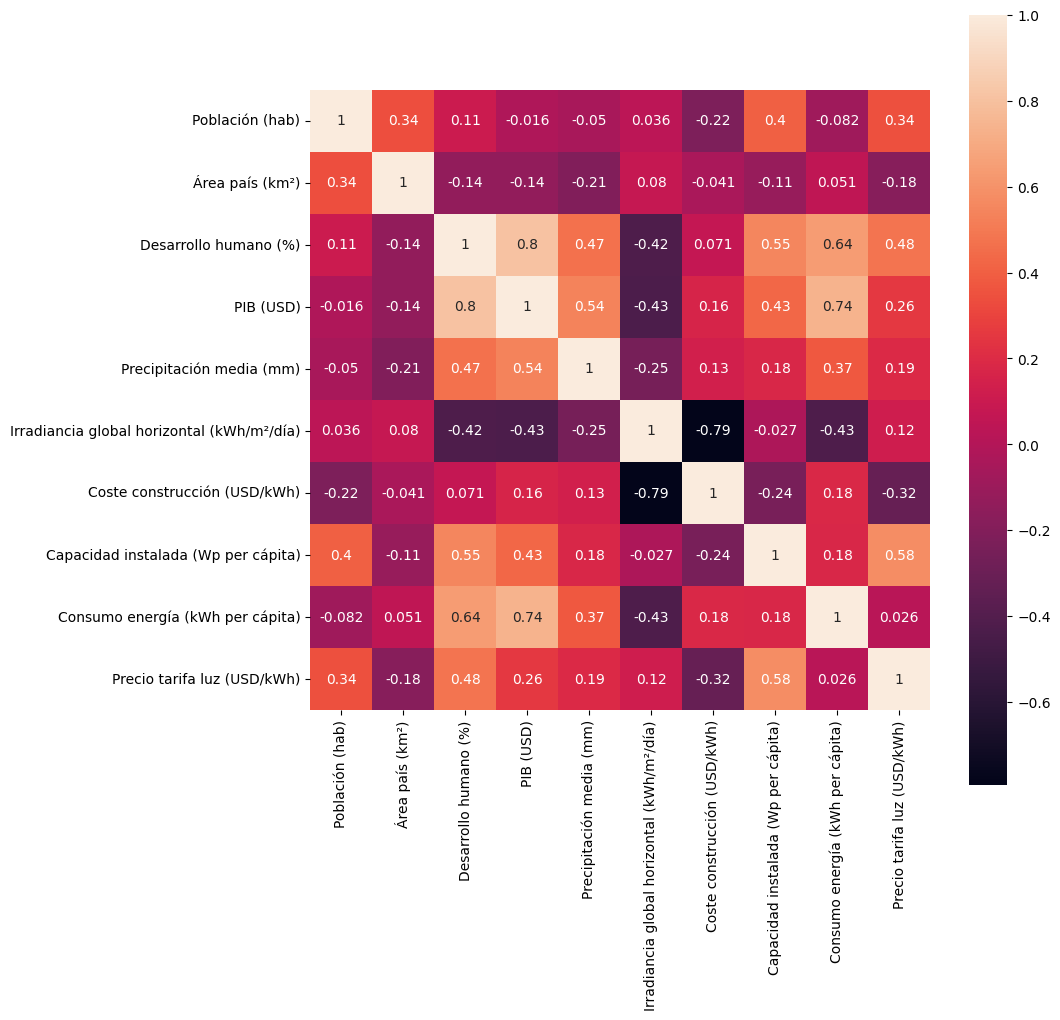

In [44]:
#Matriz de correlación
matriz_correlacion = df_eu_final.corr()

matriz_correlacion
#Mapa calor
plt.figure(figsize=(10,10))
sns.heatmap(matriz_correlacion,
            square=True, 
            annot=True)
#Aporta información pero no me gusta el formato

In [93]:
#Ver matriz de correlaciones solo valores más representativos
def mapa_calor_correlacion( df,porcentaje):
    # Supongamos que df_eu es tu DataFrame y ya has calculado la matriz de correlación
    matriz_correlacion = df.corr()

    # Filtrar la matriz de correlación para dejar solo valores superiores a 0.5 o inferiores a -0.5
    filtro_correlacion = matriz_correlacion.applymap(lambda x: x if abs(x) > porcentaje else np.nan)

    # Crear el mapa de calor
    plt.figure(figsize=(10, 10))
    sns.heatmap(filtro_correlacion,
                square=True, 
                annot=True, 
                cmap='Blues', 
                center=0,
                cbar_kws={'shrink': .5},
                linewidths=.5,
                linecolor='lightblue')

    plt.title(f'Mapa de Calor de Correlaciones (|correlación| > {porcentaje})')
    return plt.show()


# mapa_calor_correlacion(df_eu_final, 0.5)
#Esta imagen, ira a la presentación

Conclusiones del mapa de correlaciones
1. El coste economico de construir la planta y mantenerla es lo que determina junto con la irradiancia en qué paises se construira
2. El area del pais no tiene que ver, para colocar plantas fotovoltaicas
3. El PIB si que tiene una relación con las areas con instalaciones fotovoltaicas, 
4. Ver el consumo per capita
5. El aumento de precipitacion solo indica que hacen más consumo de luz


In [46]:
#Con esas conclusiones podemos empezar a buscar patrones

In [47]:
#Información relevante ordenada
df_eu_final["Irradiancia global horizontal (kWh/m²/día)" ].sort_values(ascending=False)

País
Cyprus            5.2104
Malta             5.0071
Turkey            4.5979
Spain             4.5754
Portugal          4.5656
Greece            4.4501
Armenia           4.2241
Albania           4.1954
Italy             4.0721
Azerbaijan        4.0422
Bulgaria          3.8729
Montenegro        3.8614
Kazakhstan        3.8227
Croatia           3.7370
Serbia            3.6762
Romania           3.5742
Moldova           3.5516
Hungary           3.5222
France            3.4825
Slovenia          3.4522
Switzerland       3.3567
Ukraine           3.3505
Slovakia          3.2518
Austria           3.2138
Czech Republic    3.0809
Luxembourg        3.0173
Germany           2.9777
Poland            2.9770
Belgium           2.9436
Belarus           2.9377
Netherlands       2.8649
Lithuania         2.8246
Latvia            2.7733
Denmark           2.7671
Estonia           2.7161
Sweden            2.6867
United Kingdom    2.5918
Norway            2.5833
Ireland           2.5330
Name: Irradiancia gl

In [48]:
#Información relevante ordenada
df_eu_final["Coste construcción (USD/kWh)" ].sort_values(ascending=False)

País
United Kingdom    0.1521
Belarus           0.1446
Ireland           0.1418
Ukraine           0.1295
Norway            0.1292
Estonia           0.1260
Sweden            0.1256
Latvia            0.1252
Denmark           0.1252
Lithuania         0.1241
Netherlands       0.1241
Moldova           0.1232
Belgium           0.1219
Serbia            0.1207
Romania           0.1207
Luxembourg        0.1202
Poland            0.1192
Croatia           0.1176
Czech Republic    0.1167
Kazakhstan        0.1163
Bulgaria          0.1147
Germany           0.1119
Azerbaijan        0.1116
Montenegro        0.1116
Austria           0.1094
Slovakia          0.1090
Switzerland       0.1060
Albania           0.1051
Slovenia          0.1040
Armenia           0.1038
Hungary           0.1035
France            0.0954
Malta             0.0930
Cyprus            0.0905
Greece            0.0861
Portugal          0.0826
Turkey            0.0824
Spain             0.0810
Italy             0.0673
Name: Coste construc

1 variable - Representación del mapa europeo

c:\Users\gema.sanz\AppData\Local\Programs\Python\Python312\Lib\site-packages\geopandas\geodataframe.py:1819: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super().__setitem__(key, value)


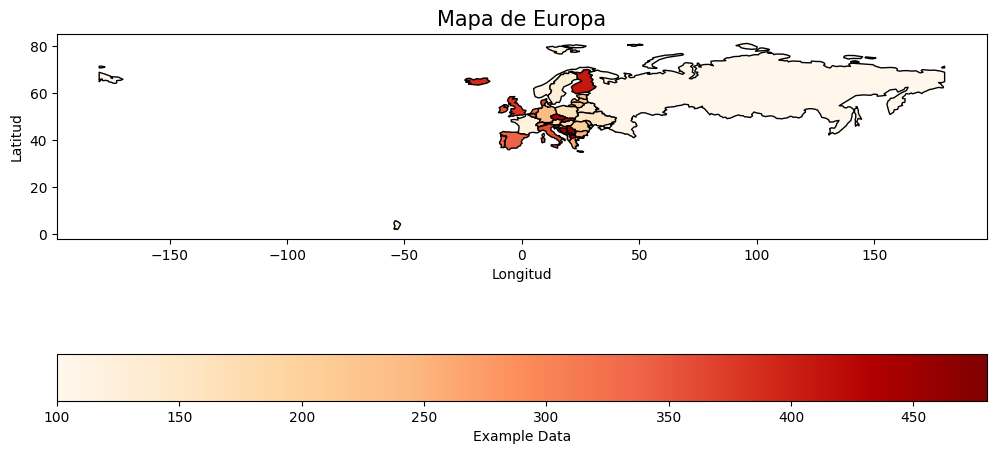

In [52]:
#VAMOS A VER SI PODEMOS REPRESENTAR EL MAPA DE EUROPA CON PYTHON Y PINTARLO CON LAS VARIABLES INDIVIDUALES

# Cargar el shapefile del mundo
gdf_world = gpd.read_file("./data/ne_110m_admin_0_countries.shp")

# Filtrar para mantener solo los países de Europa
gdf_europe = gdf_world[gdf_world['CONTINENT'] == 'Europe']

# Crear una columna de ejemplo para colorear, puedes reemplazar esto con tus propios datos
# Por ejemplo, podrías agregar una columna con datos de población, PIB, etc.
gdf_europe['example_data'] = [100 + i * 10 for i in range(len(gdf_europe))]  # Datos de ejemplo

# Crear la visualización
fig, ax = plt.subplots(figsize=(12, 10))

# Dibujar el mapa de Europa con colores basados en 'example_data'
# El parámetro 'cmap' define la paleta de colores
gdf_europe.plot(column='example_data', ax=ax, legend=True,
                legend_kwds={'label': "Example Data",
                             'orientation': "horizontal"},
                cmap='OrRd',  # Paleta de colores (puedes cambiar a tu preferencia)
                edgecolor='black')

# Ajustar los detalles del mapa
ax.set_title('Mapa de Europa', fontsize=15)
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Mostrar el mapa
plt.show()

#Vemos que funciona

Text(217.09722222222223, 0.5, 'Latitud')

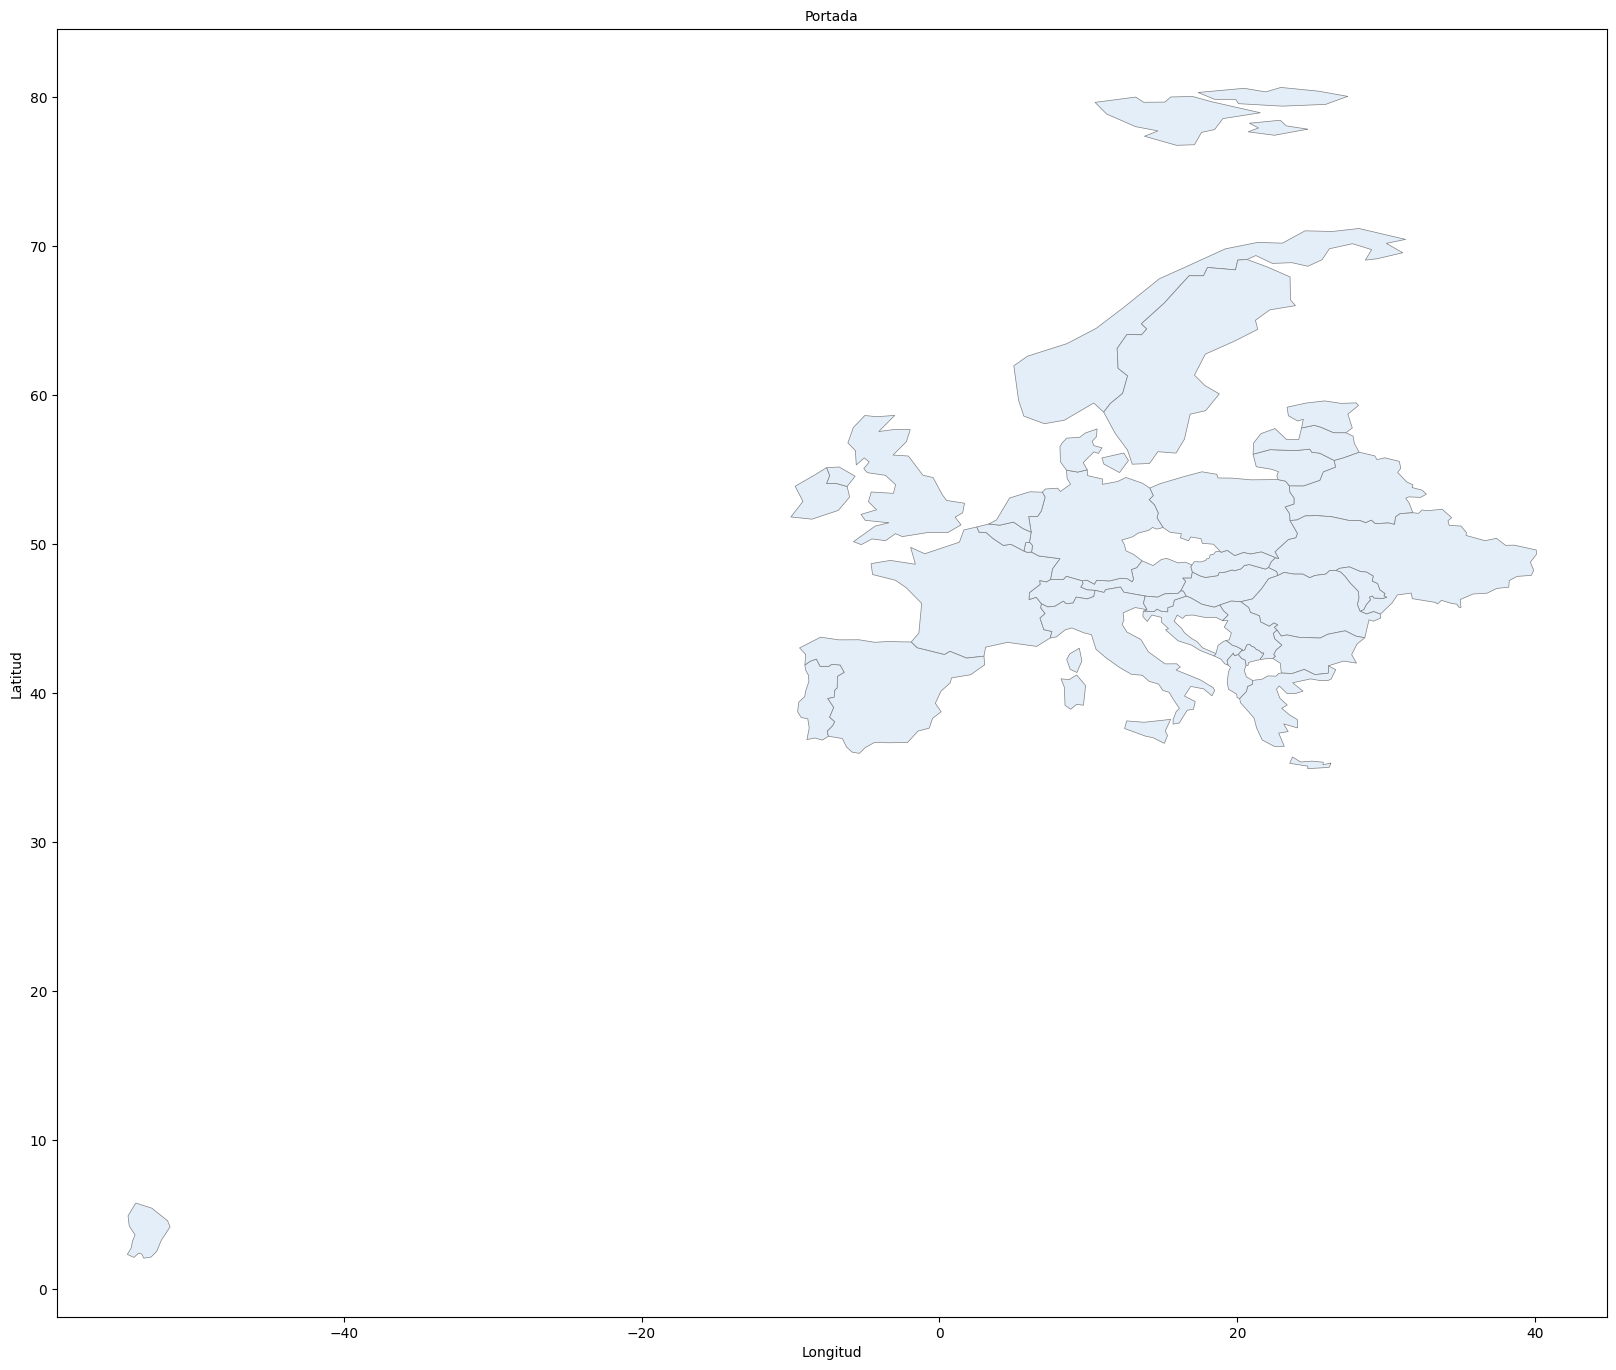

In [53]:
    # Hacemos pruebas para que solo veamos los paises del estudio en el mapa y quede más marketiniano
    df_eu = pd.read_csv("./data/df_eu.csv")
    df_eu_final = pd.read_csv("./data/df_eu_final.csv",index_col= "País")
    
    gdf_mundo = gpd.read_file("./data/ne_110m_admin_0_countries.shp")

    # Renombrar la columna para que coincida
    gdf_mundo.rename(columns={"NAME": "País"}, inplace=True)

    # Filtrar para mantener solo los países de Europa
    gdf_eu = gdf_mundo[gdf_mundo['CONTINENT'] == 'Europe']

    # Establecer el índice para poder unirlos
    gdf_eu.set_index("País", inplace=True)

    # Unir el GeoDataFrame con el DataFrame de datos
    gdf_eu_final = gdf_eu.join(df_eu_final)

    # Filtrar para mantener solo los países presentes en df_eu
    gdf_eu_final = gdf_eu_final[gdf_eu_final.index.isin(df_eu["Pais"])]

   #Columna nueva para mantener color e intensidad
    gdf_eu_final['color_value'] = 0.1


    # Crear la visualización
    fig, ax = plt.subplots(figsize=(20, 20))
    
    # Dibujar el mapa de Europa con colores basados en 'dato'
    gdf_eu_final.plot(column='color_value',
                        ax=ax,
                        legend=False,
                        legend_kwds={'label': ".",
                                     'orientation': "vertical"},
                        cmap="Blues",
                        edgecolor='grey',
                        linewidth = 0.5,
                        vmin = 0,
                        vmax = 1)

    # Ajustar los detalles del mapa
    ax.set_title("Portada", fontsize=10)
    ax.set_xlabel('Longitud')
    ax.set_ylabel('Latitud')

In [54]:
#Creamos una función para imprimir todos los mapas de golpe
def mapa_europa(dato):
    # Cargar dataframes
    df_eu = pd.read_csv("./data/df_eu.csv")
    df_eu_final = pd.read_csv("./data/df_eu_final.csv",index_col= "País")
    
    # Cargar el shapefile del mundo
    gdf_mundo = gpd.read_file("./data/ne_110m_admin_0_countries.shp")

    # Renombrar la columna para que coincida
    gdf_mundo.rename(columns={"NAME": "País"}, inplace=True)

    # Filtrar para mantener solo los países de Europa
    gdf_eu = gdf_mundo[gdf_mundo['CONTINENT'] == 'Europe']

    # Establecer el índice para poder unirlos
    gdf_eu.set_index("País", inplace=True)

    # Unir el GeoDataFrame con el DataFrame de datos
    gdf_eu_final = gdf_eu.join(df_eu_final)

    # Filtrar para mantener solo los países presentes en df_eu
    gdf_eu_final = gdf_eu_final[gdf_eu_final.index.isin(df_eu["Pais"])]

    # Verificar si la columna 'dato' existe en el DataFrame unido
    if dato not in gdf_eu_final.columns:
        raise ValueError(f"La columna '{dato}' no existe en el DataFrame.")
        
    # Crear la visualización
    fig, ax = plt.subplots(figsize=(20, 20))
    
    # Dibujar el mapa de Europa con colores basados en 'dato'
    gdf_eu_final.plot(column=dato,
                        ax=ax,
                        legend=True,
                        legend_kwds={'label': dato,
                                     'orientation': "vertical"},
                        cmap ="Blues",
                        edgecolor='grey',
                        linewidth = 0.5)

    # Ajustar los detalles del mapa
    ax.set_title(dato)
    ax.set_xlabel('Longitud')
    ax.set_ylabel('Latitud')

    # Mostrar el mapa

    return plt.show()

In [94]:
#Imprimimos todos los mapas de europa para ver el impacto de una variable
# for elemento in df_eu_final:
#     mapa_europa(elemento)
    #Estos si van a la presentación

In [61]:
#Volvemos a ver el mapa de calor de las correlaciones para ver que dirección tomamos puesto que aun no he encontrado relaciones
df_eu_capacidad_upper = df_eu_final.sort_values(by = "Capacidad instalada (Wp per cápita)",ascending= False )

C:\Users\gema.sanz\AppData\Local\Temp\ipykernel_14304\2551879762.py:7: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  filtro_correlacion = matriz_correlacion.applymap(lambda x: x if abs(x) > porcentaje else np.nan)


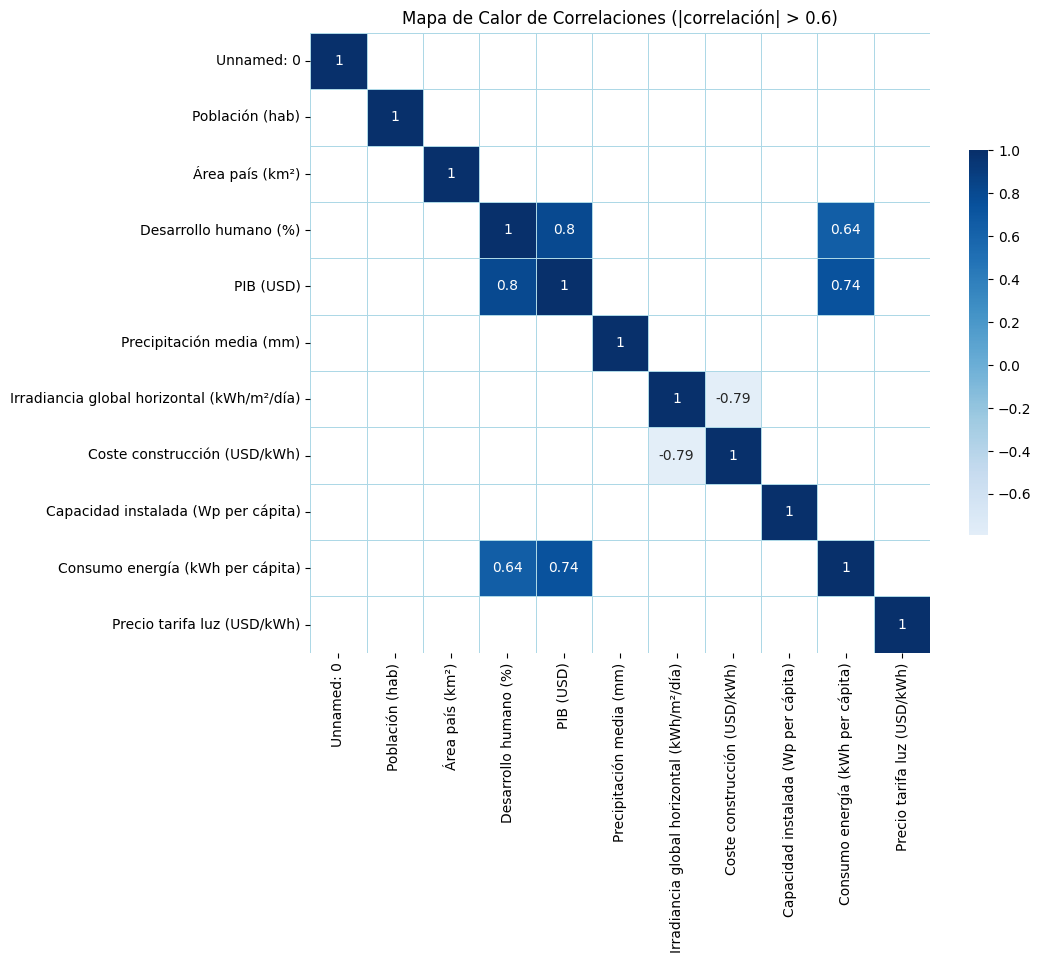

In [62]:
mapa_calor_correlacion(df_eu_capacidad_upper, 0.6)

In [63]:
#Relaciones a estudiar en grafico de dispersión con burbujas, x pais, burbuja variables, y capacidad
''' 
1. Tarifa luz vs Capacidad
2. Poblacion vs Capacidad
3. Area vs Capacidad (No es necesario porque población y area están muy similar)
________________

'''

' \n1. Tarifa luz vs Capacidad\n2. Poblacion vs Capacidad\n3. Area vs Capacidad (No es necesario porque población y area están muy similar)\n________________\n\n'

In [64]:
df_eu_capacidad_upper.columns

Index(['Unnamed: 0', 'Población (hab)', 'Área país (km²)',
       'Desarrollo humano (%)', 'PIB (USD)', 'Precipitación media (mm)',
       'Irradiancia global horizontal (kWh/m²/día)',
       'Coste construcción (USD/kWh)', 'Capacidad instalada (Wp per cápita)',
       'Consumo energía (kWh per cápita)', 'Precio tarifa luz (USD/kWh)'],
      dtype='object')

3 variables - Gráficos de dispersion

In [65]:
#Funcion para grafico de dispersión con 3 variables y todos los parametros
def dispersion_3_var(df,x1, z1):
    num_graphs = len(df.columns)
    for y1 in df.columns:
        plt.figure()  # Crea una nueva figura
        sns.scatterplot(x=x1,
                        y=y1,
                        size=df[z1],
                        hue=df[z1],
                        palette= "Blues",
                        data=df,
                        edgecolor='grey',
                        legend=False)  # Esto quita la leyenda)
    # Mostrar todas las gráficas
    return plt.show()

In [97]:
# #VARIABLE CAPACIDAD INSTALADA COMO PRINCIPAL
# dispersion_3_var(df_eu_capacidad_upper,"Capacidad instalada (Wp per cápita)","Capacidad instalada (Wp per cápita)")

In [98]:
#VARIABLE PRINCIPAL COSTE
# dispersion_3_var(df_eu_capacidad_upper, "Coste construcción (USD/kWh)","Capacidad instalada (Wp per cápita)")

In [99]:
#VARIABLE PRINCIPAL IRRADIANCIA
# dispersion_3_var(df_eu_capacidad_upper, "Irradiancia global horizontal (kWh/m²/día)","Capacidad instalada (Wp per cápita)" )

In [100]:
# #VARIABLE PRINCIPAL CONSUMO PER CAPITA
# dispersion_3_var(df_eu_capacidad_upper,"Consumo energía (kWh per cápita)","Capacidad instalada (Wp per cápita)")

In [101]:
#VARIABLE PRINCIPAL DESARROLLO HUMANO
# dispersion_3_var(df_eu_capacidad_upper, "Desarrollo humano (%)","Capacidad instalada (Wp per cápita)")

In [102]:
# dispersion_3_var(df_eu_capacidad_upper,"Precio tarifa luz (USD/kWh)","Capacidad instalada (Wp per cápita)")

4 variables - Gráfico de dispersión

In [ ]:
#Función grafico dispersión de 4 variables
def dispersion_4_var(df,x1,z1,w1):
    num_graphs = len(df.columns)
    for y1 in df.columns:
        plt.figure()  # Crea una nueva figura
        sns.scatterplot(x=x1,
                        y=y1,
                        size=df[z1],
                        hue=df[w1],
                        palette= "Blues",
                        data=df,
                        edgecolor='grey',
                        legend=False)  # Esto quita la leyenda)
    # Mostrar todas las gráficas
    return plt.show()

In [103]:
# dispersion_4_var(df_eu_capacidad_upper,"Desarrollo humano (%)","Consumo energía (kWh per cápita)", "Capacidad instalada (Wp per cápita)" )

In [104]:
# dispersion_4_var(df_eu_capacidad_upper,"Desarrollo humano (%)","Coste construcción (USD/kWh)", "Capacidad instalada (Wp per cápita)" )

In [107]:

#Si no encontramos porque se invierte, quiza interesa saber porque NO se invierte,
# slicing de coste  de 0.10 a 0.13 y capacidad instalada menor

df_eu_coste = df_eu_final.loc[(df_eu_final["Coste construcción (USD/kWh)"]<0.13) & (df_eu_final["Coste construcción (USD/kWh)"]>0.10) ]

In [105]:
# dispersion_4_var(df_eu_coste,"Capacidad instalada (Wp per cápita)","Capacidad instalada (Wp per cápita)", "Capacidad instalada (Wp per cápita)" )

In [106]:
# #Para ver todas las posibles graficas de 4 variables, aunque vamos a tratarla como una de 3
# for elemento in df_eu_coste.columns:
#     dispersion_4_var(df_eu_coste,elemento,"Capacidad instalada (Wp per cápita)", "Capacidad instalada (Wp per cápita)" )

Comprobación de hipotesis

In [ ]:
#Me interesa comprobar las conclusiones a las que he llegado mediante las gráficas
df_eu_capacidad_upper = df_eu_final.sort_values(by = "Capacidad instalada (Wp per cápita)",ascending= False )
df_eu_capacidad_upper_slicing = df_eu_capacidad_upper.head(15)
df_eu_capacidad_upper_slicing
df_eu_capacidad_upper["Capacidad instalada (Wp per cápita)"].median()
df_eu_capacidad_upper["Capacidad instalada (Wp per cápita)"].mean()

df_eu_capacidad_upper.columns

Index(['Unnamed: 0', 'Población (hab)', 'Área país (km²)',
       'Desarrollo humano (%)', 'PIB (USD)', 'Precipitación media (mm)',
       'Irradiancia global horizontal (kWh/m²/día)',
       'Coste construcción (USD/kWh)', 'Capacidad instalada (Wp per cápita)',
       'Consumo energía (kWh per cápita)', 'Precio tarifa luz (USD/kWh)'],
      dtype='object')

In [ ]:
df_eu_capacidad_upper_comprobacion = df_eu_capacidad_upper_slicing.copy()
df_eu_capacidad_upper_comprobacion.drop(columns=['Unnamed: 0',
                                                  'Población (hab)',
                                                  'Área país (km²)',
                                                  'Desarrollo humano (%)',
                                                  'Precipitación media (mm)',
                                                  'Precio tarifa luz (USD/kWh)'], inplace=True)
#Datos para comprobacion
df_eu_capacidad_upper_comprobacion

,PIB (USD),Irradiancia global horizontal (kWh/m²/día),Coste construcción (USD/kWh),Capacidad instalada (Wp per cápita),Consumo energía (kWh per cápita)
País,,,,,
Germany,48195.579904,2.9777,0.1119,553.854467,7035.482975
Belgium,46556.099567,2.9436,0.1219,352.440556,7709.123078
Italy,34318.351124,4.0721,0.0673,332.940143,5002.406680
Switzerland,82838.929445,3.3567,0.1060,263.722029,7520.166025
Malta,30074.741185,5.0071,0.0930,263.272186,4924.544019
Greece,20324.253564,4.4501,0.0861,247.164621,5062.606422
Netherlands,53024.059213,2.8649,0.1241,240.844751,6712.774758
Luxembourg,114340.498742,3.0173,0.1202,220.493379,13914.678449
United Kingdom,42491.364435,2.5918,0.1521,197.145419,5129.527793


In [ ]:
#Tabla final de comprobación

df_eu_capacidad_upper_comprobacion.loc[df_eu_capacidad_upper_comprobacion["Coste construcción (USD/kWh)"] > 0.10 ].head(5)

,PIB (USD),Irradiancia global horizontal (kWh/m²/día),Coste construcción (USD/kWh),Capacidad instalada (Wp per cápita),Consumo energía (kWh per cápita)
País,,,,,
Germany,48195.579904,2.9777,0.1119,553.854467,7035.482975
Belgium,46556.099567,2.9436,0.1219,352.440556,7709.123078
Switzerland,82838.929445,3.3567,0.1060,263.722029,7520.166025
Netherlands,53024.059213,2.8649,0.1241,240.844751,6712.774758
Luxembourg,114340.498742,3.0173,0.1202,220.493379,13914.678449


## 7. CONCLUSIÓN ANALISIS


La hipótesis inicial era la inversión en plantas solares debido a la alta irradiancia. Está hipótesis, es “falsa” a medias. 
Porque, además de la irradiancia depende de otros parámetros.

Vemos que hay relaciones entre:
- PIB – Desarrollo humano
- PIB – Consumo energético
- PIB – Irradiancia global horizontal
- Irradiancia global horizontal – Coste de construcción


Parámetros decisorios:
-	Coste de construcción 0.10 - 0.13
-	PIB > 42300
-	Consumo energético >5800
-	IGH > 2.75


Vemos que podemos estudiar también por debajo de los 0.10 de coste de construcción junto con alta irradiancia. Para ver cual es el otro escenario.


